# Dropout

## Target
Add dropout to all convolution layers (except last one) to reduce overfitting. Reduction in accuracy is expected.

## Results
- `Total parameters:` 7,624
- Best Training Accuracy: 99.01% - 14th Epoch
- Best Testing Accuracy: 99.24% - 13th Epoch

## Analysis
- Overfitting is no longer present, and slight underfitting is present.
- Overall accuracy has reduced which is expected considering dropout has been added.

## Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/S7'
%cd $BASE_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/S7


In [ ]:
from model_4 import Net, model_summary, model_train, model_test, draw_graphs

## Data Transformation

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Data Loaders

In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Train and Test

In [ ]:
from torch.optim.lr_scheduler import StepLR, ExponentialLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 1


Loss=0.11114021390676498 Batch_id=468 Accuracy=90.50: 100%|██████████| 469/469 [00:17<00:00, 26.40it/s]



Test set: Average loss: 0.1222, Accuracy: 9629/10000 (96.29%)

EPOCH: 2


Loss=0.1584821194410324 Batch_id=468 Accuracy=97.12: 100%|██████████| 469/469 [00:17<00:00, 26.87it/s]



Test set: Average loss: 0.0687, Accuracy: 9792/10000 (97.92%)

EPOCH: 3


Loss=0.10158231109380722 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:18<00:00, 25.07it/s]



Test set: Average loss: 0.0570, Accuracy: 9825/10000 (98.25%)

EPOCH: 4


Loss=0.03250913694500923 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:17<00:00, 27.13it/s]



Test set: Average loss: 0.0533, Accuracy: 9820/10000 (98.20%)

EPOCH: 5


Loss=0.049914855509996414 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:17<00:00, 26.69it/s]



Test set: Average loss: 0.0397, Accuracy: 9878/10000 (98.78%)

EPOCH: 6


Loss=0.0161228459328413 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:18<00:00, 25.24it/s]



Test set: Average loss: 0.0342, Accuracy: 9887/10000 (98.87%)

EPOCH: 7


Loss=0.008571475744247437 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:17<00:00, 27.28it/s]



Test set: Average loss: 0.0342, Accuracy: 9896/10000 (98.96%)

EPOCH: 8


Loss=0.009349065832793713 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:17<00:00, 26.78it/s]



Test set: Average loss: 0.0298, Accuracy: 9906/10000 (99.06%)

EPOCH: 9


Loss=0.04056117311120033 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:17<00:00, 26.86it/s]



Test set: Average loss: 0.0354, Accuracy: 9889/10000 (98.89%)

EPOCH: 10


Loss=0.03219529613852501 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:17<00:00, 26.96it/s]



Test set: Average loss: 0.0321, Accuracy: 9893/10000 (98.93%)

EPOCH: 11


Loss=0.10610568523406982 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:20<00:00, 23.32it/s]



Test set: Average loss: 0.0338, Accuracy: 9892/10000 (98.92%)

EPOCH: 12


Loss=0.005448514595627785 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:17<00:00, 26.97it/s]



Test set: Average loss: 0.0276, Accuracy: 9913/10000 (99.13%)

EPOCH: 13


Loss=0.08344954252243042 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:17<00:00, 27.27it/s]



Test set: Average loss: 0.0281, Accuracy: 9910/10000 (99.10%)

EPOCH: 14


Loss=0.012830116786062717 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:18<00:00, 24.99it/s]



Test set: Average loss: 0.0279, Accuracy: 9924/10000 (99.24%)

EPOCH: 15


Loss=0.03299553319811821 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:17<00:00, 27.29it/s]



Test set: Average loss: 0.0287, Accuracy: 9908/10000 (99.08%)



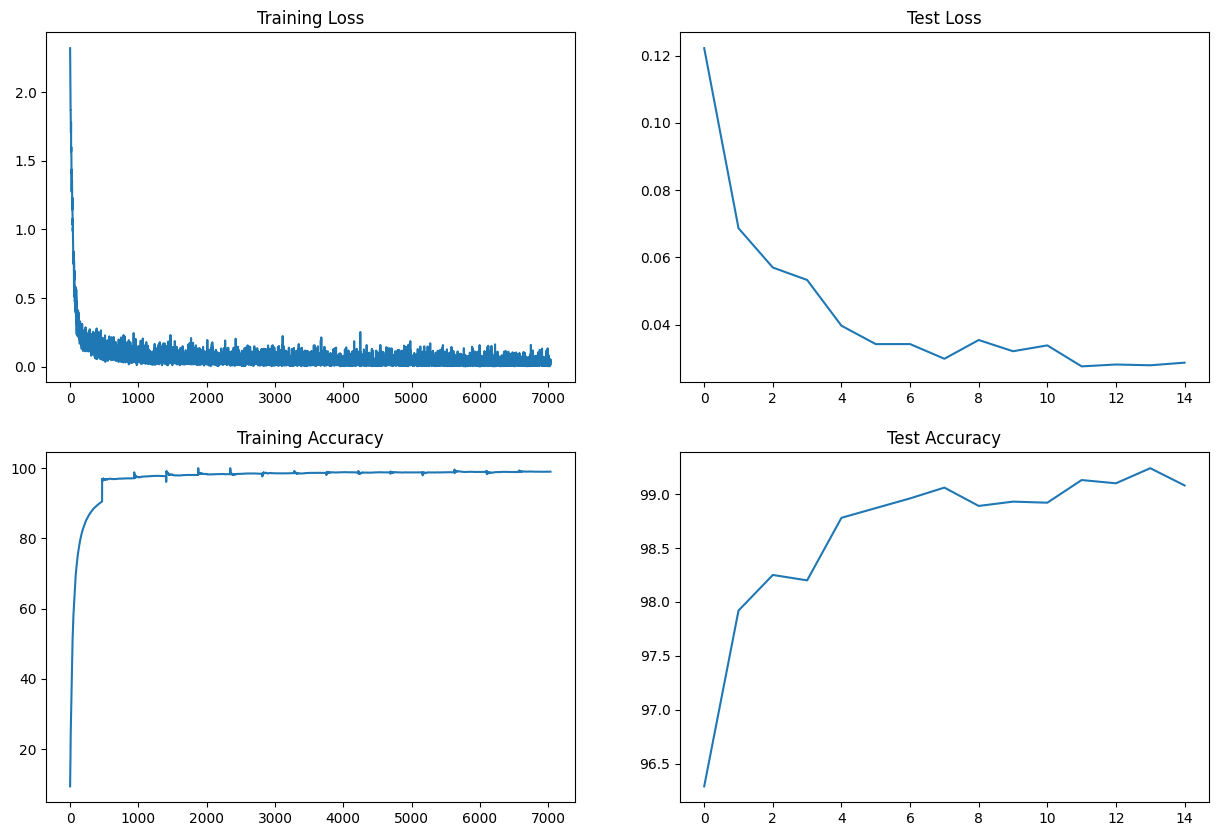

In [ ]:
draw_graphs()